In [498]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import recall_score, roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

In [499]:
df=pd.read_excel("Employee_attrition.xlsx")

In [500]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,ResearchDevelopment,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,ResearchDevelopment,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,ResearchDevelopment,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,ResearchDevelopment,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [501]:
df.isnull().values.any()  #we have no missing values

False

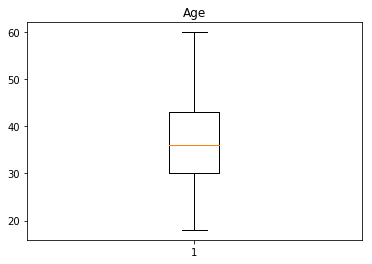

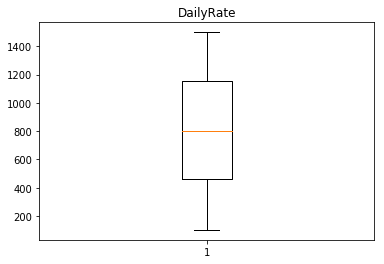

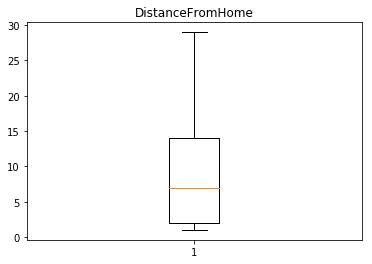

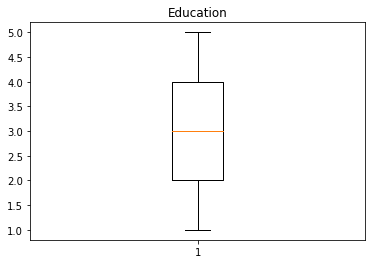

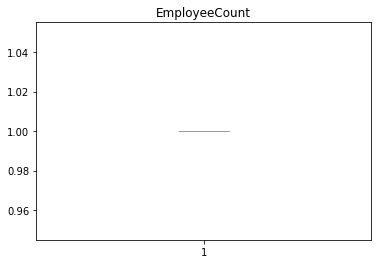

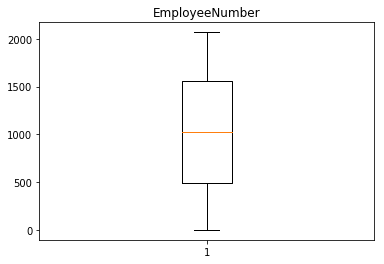

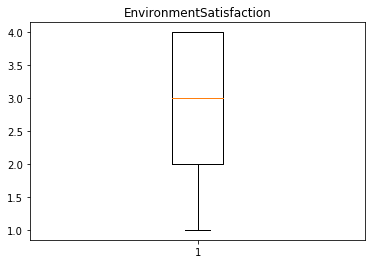

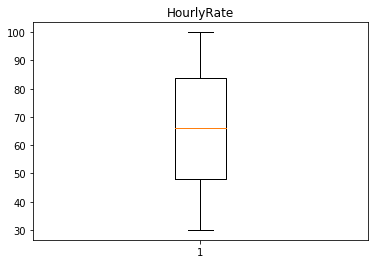

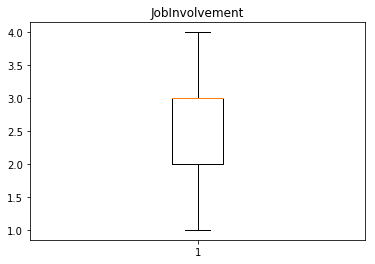

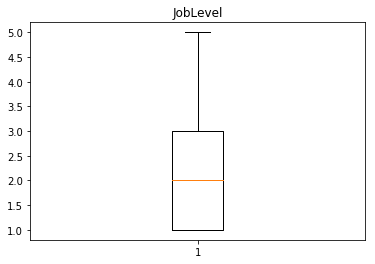

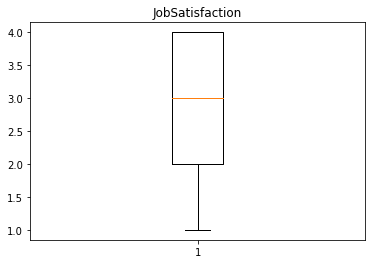

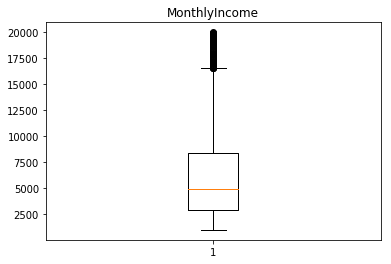

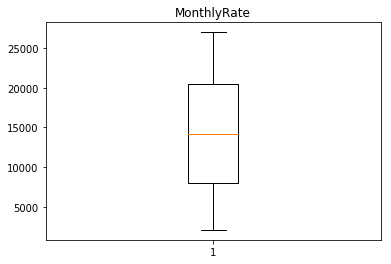

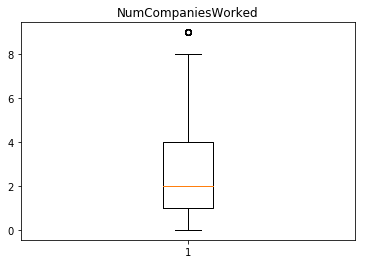

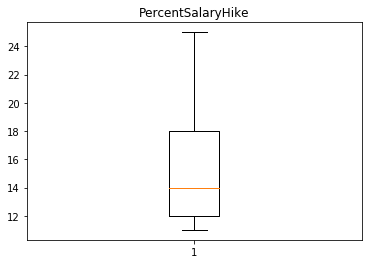

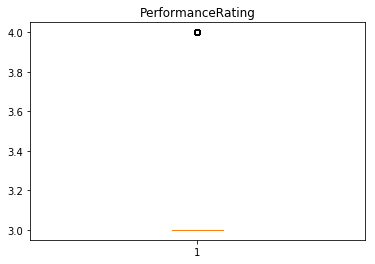

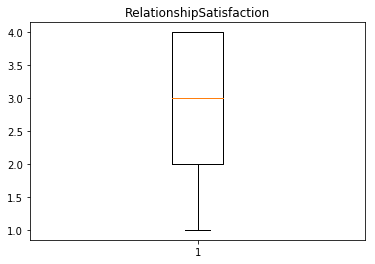

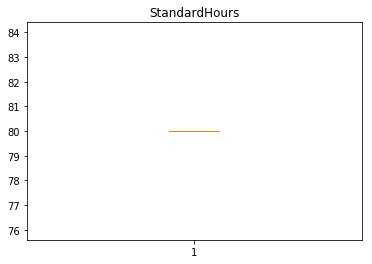

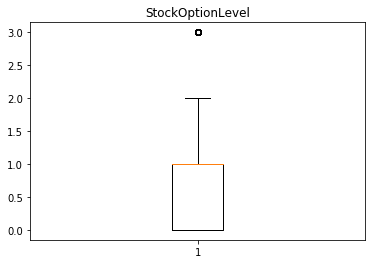

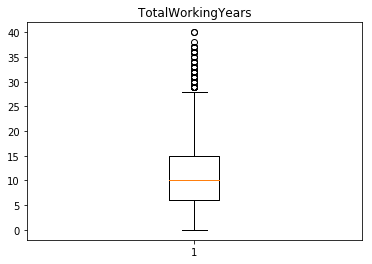

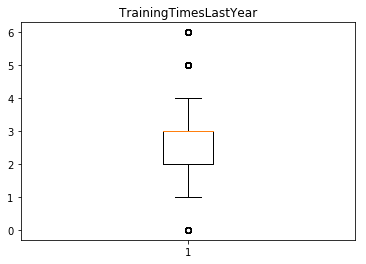

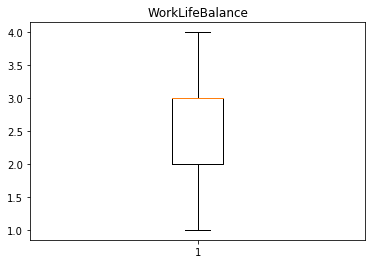

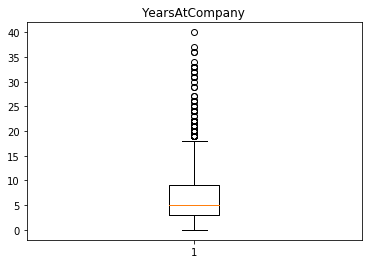

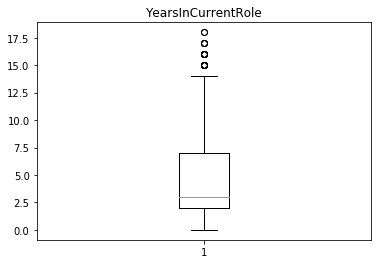

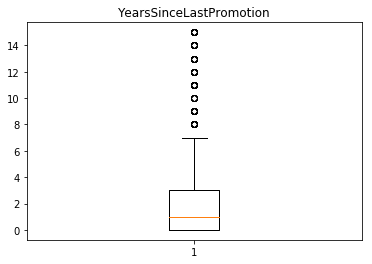

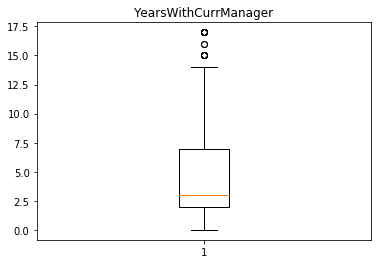

In [502]:
for i in df.select_dtypes(exclude="object").columns:       
    plt.boxplot(df[i]) 
    plt.title(i)                 
    plt.show()

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [504]:
df=df[(np.abs(df.TotalWorkingYears-df.TotalWorkingYears.mean())<(3*df.TotalWorkingYears.std()))]
df=df[(np.abs(df.YearsInCurrentRole-df.YearsInCurrentRole.mean())<(3*df.YearsInCurrentRole.std()))]
df=df[(np.abs(df.YearsSinceLastPromotion-df.YearsSinceLastPromotion.mean())<(3*df.YearsSinceLastPromotion.std()))]
df=df[(np.abs(df.TrainingTimesLastYear-df.TrainingTimesLastYear.mean())<(3*df.TrainingTimesLastYear.std()))]
df=df[(np.abs(df.YearsWithCurrManager-df.YearsWithCurrManager.mean())<(3*df.YearsWithCurrManager.std()))]

In [505]:
df.index=range(0,len(df))

In [506]:
df.Attrition=df.Attrition.astype("category").cat.reorder_categories(["No","Yes"]).cat.codes 

In [507]:
data_numeric=df.select_dtypes(exclude="object")
data_object=df.select_dtypes(include="object")

In [508]:
for i in data_numeric.columns:
    if data_numeric[i].var()==0:
        data_numeric=data_numeric.drop(i,axis=1)

In [509]:
data_numeric.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,...,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,36.360573,0.165591,804.204301,9.150538,2.894624,1026.341219,2.724014,65.837276,2.731900,1.970609,...,3.152688,2.701792,0.797133,10.437993,2.811470,2.759140,6.256631,3.884588,1.794982,3.822222
std,8.903259,0.371847,403.195467,8.075611,1.022526,601.370585,1.092805,20.284845,0.709502,1.031010,...,0.359816,1.079995,0.854387,6.899119,1.293793,0.707143,5.058207,3.248045,2.530356,3.270659
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.500000,2.000000,2.000000,492.500000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,805.000000,7.000000,3.000000,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,0.000000,1157.500000,14.000000,4.000000,1556.500000,4.000000,83.000000,3.000000,2.000000,...,3.000000,4.000000,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,1498.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,34.000000,6.000000,4.000000,33.000000,14.000000,11.000000,14.000000


C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


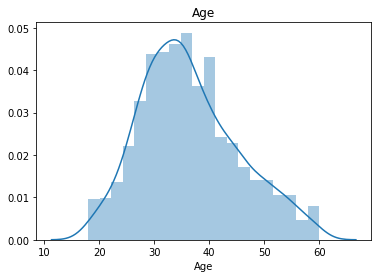

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


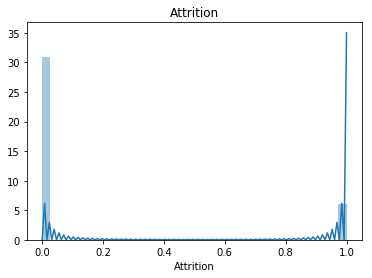

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


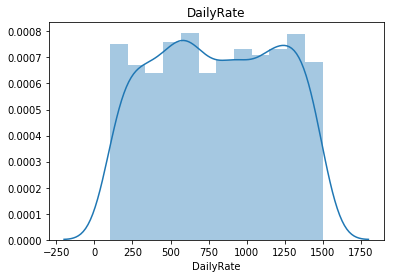

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


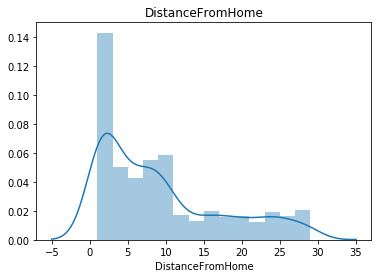

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


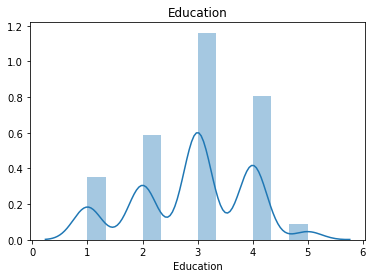

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


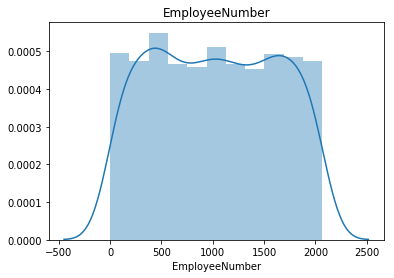

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


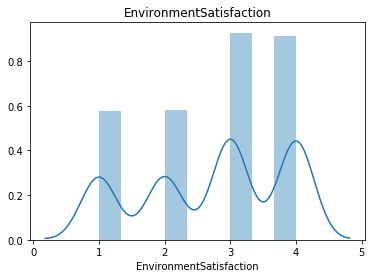

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


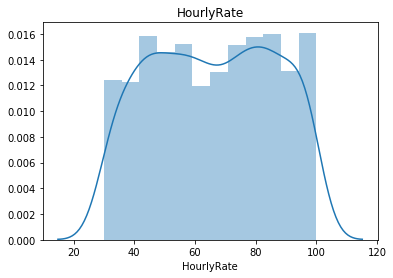

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


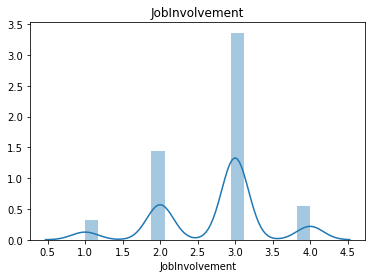

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


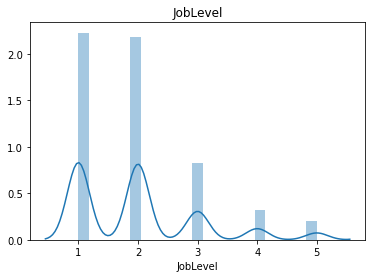

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


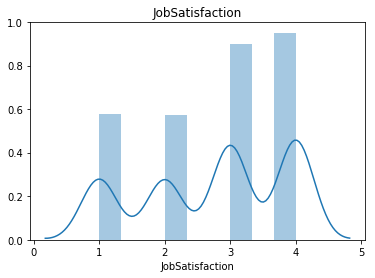

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


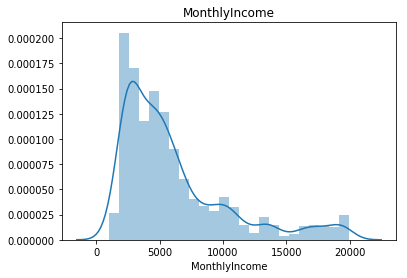

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


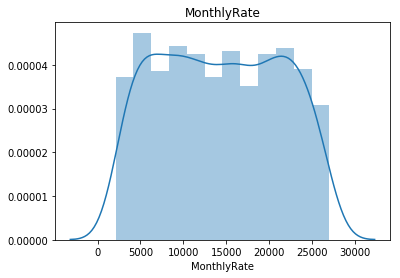

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


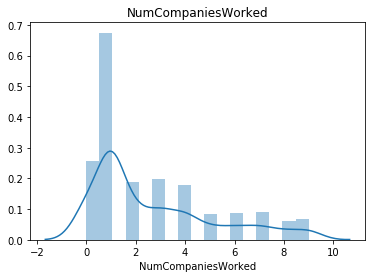

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


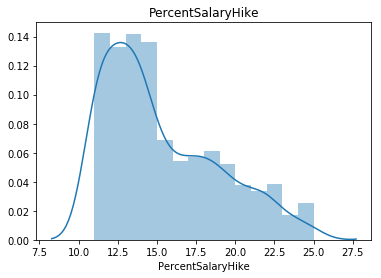

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


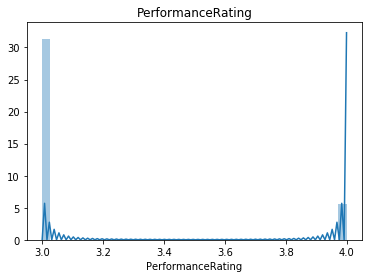

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


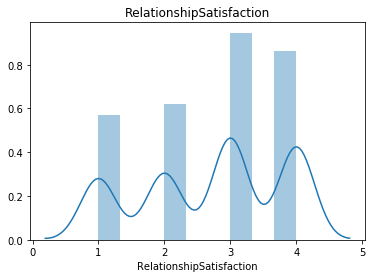

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


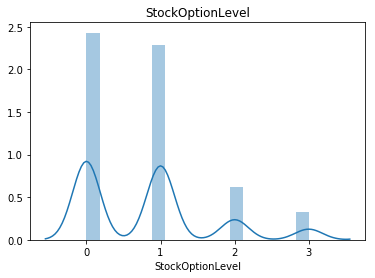

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


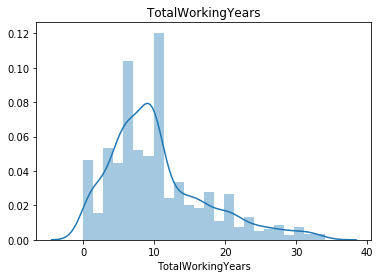

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


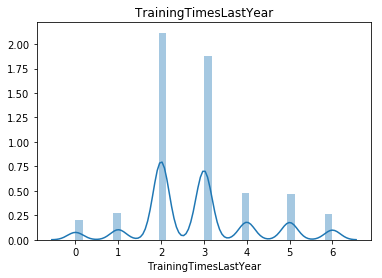

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


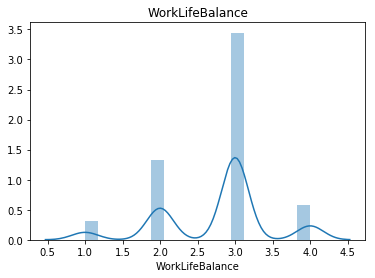

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


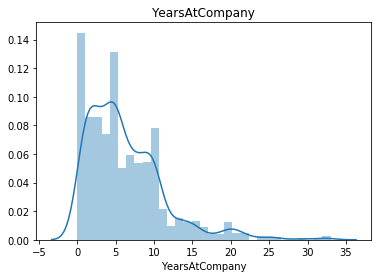

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


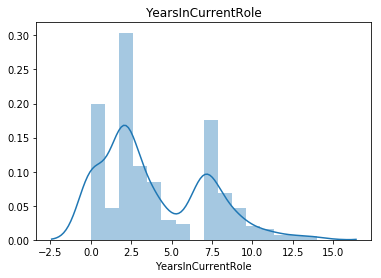

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


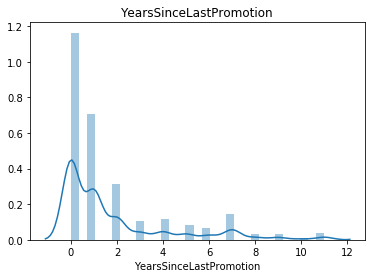

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


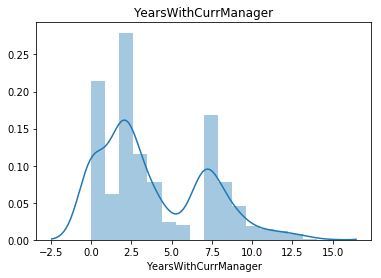

In [510]:
for i in data_numeric.columns:
    sns.distplot(data_numeric[i])
    plt.title(i)                 
    plt.show()
    

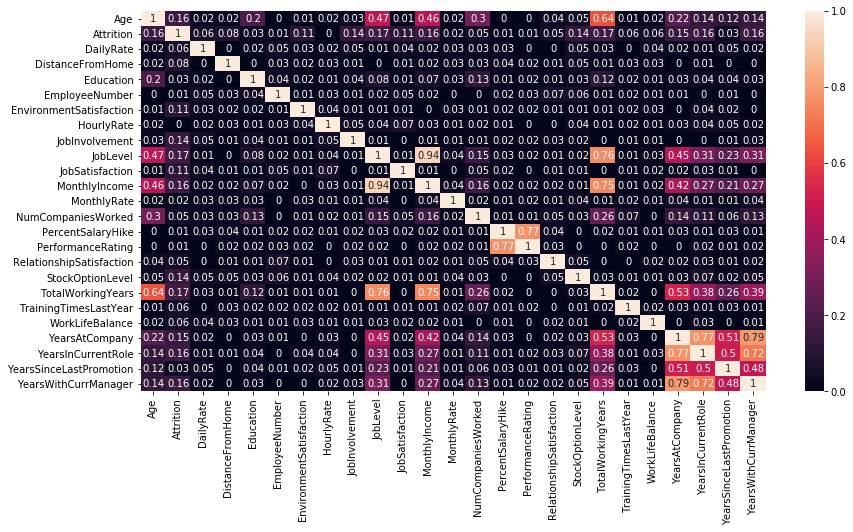

In [511]:
plt.figure(figsize=(14,7))         #some of them are very correlated
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)
plt.show()

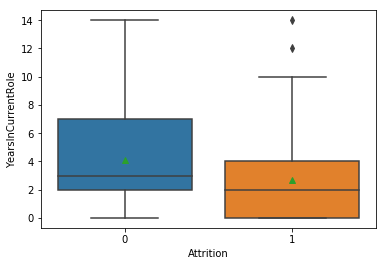

In [512]:
sns.boxplot(data_numeric.Attrition,data_numeric.YearsInCurrentRole,showmeans=True)

In [513]:
# as the correlation>75% are too many,let's get rid of >75%
# as monthly income has outliers let's delete it to get rid of 95 % correlation
data_numeric=data_numeric.drop(["MonthlyIncome","YearsAtCompany","PerformanceRating","JobLevel"],axis=1)

In [514]:
for i in data_object.columns:
    j=len(data_object[i].unique())
    if j==1:
        data_object=data_object.drop(i,axis=1)

In [515]:
data_object.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life_Sciences,Female,Sales_Executive,Single,Yes
1,Travel_Frequently,ResearchDevelopment,Life_Sciences,Male,Research_Scientist,Married,No
2,Travel_Rarely,ResearchDevelopment,Other,Male,Laboratory_Technician,Single,Yes
3,Travel_Frequently,ResearchDevelopment,Life_Sciences,Female,Research_Scientist,Married,Yes
4,Travel_Rarely,ResearchDevelopment,Medical,Male,Laboratory_Technician,Married,No


In [516]:
data_dummies=pd.get_dummies(data_object,drop_first=True,prefix=data_object.columns)

In [517]:
data_dummies.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_ResearchDevelopment,Department_Sales,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,Gender_Male,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [518]:
data=data_numeric.join(data_dummies)

In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 42 columns):
Age                                 1395 non-null int64
Attrition                           1395 non-null int8
DailyRate                           1395 non-null int64
DistanceFromHome                    1395 non-null int64
Education                           1395 non-null int64
EmployeeNumber                      1395 non-null int64
EnvironmentSatisfaction             1395 non-null int64
HourlyRate                          1395 non-null int64
JobInvolvement                      1395 non-null int64
JobSatisfaction                     1395 non-null int64
MonthlyRate                         1395 non-null int64
NumCompaniesWorked                  1395 non-null int64
PercentSalaryHike                   1395 non-null int64
RelationshipSatisfaction            1395 non-null int64
StockOptionLevel                    1395 non-null int64
TotalWorkingYears                   1395 non-null int6

In [520]:
X=data.drop("Attrition",axis=1)
Y=data.Attrition 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [521]:
#83.5 % of employees have not churned
#This means that without any model the accuracy of our prediction that employees will stay will be almost 83.5 %
#83.5% is like a benchmark
data.Attrition.value_counts()/len(data)*100

0    83.44086
1    16.55914
Name: Attrition, dtype: float64

# Decision tree with unscaled data

In [522]:
#we see that data should be balanced to give better results but let's try with gridsearch
gridsearch=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid={'max_depth': range(3,20),"min_samples_leaf":range(50,200),"class_weight":[None,"balanced"]},scoring="roc_auc",cv=5, n_jobs=-1)
gridsearch.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(3, 20), 'min_samples_leaf': range(50, 200), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [523]:
best_params=list(gridsearch.best_params_.values())
print(best_params)
print(gridsearch.best_score_)

[None, 6, 55]
0.7352459766743342


In [524]:
tree_unbalanced=DecisionTreeClassifier(max_depth=best_params[1],min_samples_leaf=best_params[2],class_weight=best_params[0],random_state=42)
tree_unbalanced=tree_unbalanced.fit(X_train,Y_train)

In [525]:
for i in [tree_unbalanced]:
    print("Recall_train:",(recall_score(Y_train,i.predict(X_train))).round(4)*100)
    print("Recall_test:",(recall_score(Y_test,i.predict(X_test))).round(4)*100)
    print("roc_auc_train:",(roc_auc_score(Y_train,i.predict(X_train))).round(4)*100)
    print("roc_auc_test:",(roc_auc_score(Y_test,i.predict(X_test))).round(4)*100)
    print("Train scores:",(i.score(X_train,Y_train)).round(4)*100)
    print("Test scores:",(i.score(X_test,Y_test)).round(4)*100)
    print("-------")

Recall_train: 0.0
Recall_test: 0.0
roc_auc_train: 50.0
roc_auc_test: 50.0
Train scores: 83.08
Test scores: 84.53
-------


In [526]:
#we get very bad results so we should balance the data

In [527]:
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(class_weight="balanced",random_state=42),param_grid={'max_depth': range(3,20),"min_samples_leaf":range(50,200)},scoring="roc_auc",cv=5, n_jobs=-1)
grid_search.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(3, 20), 'min_samples_leaf': range(50, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [528]:
best=list(grid_search.best_params_.values())
print(best)
print("Best Score:",grid_search.best_score_.round(4)*100)

[6, 62]
Best Score: 72.14


In [529]:
tree2=DecisionTreeClassifier(max_depth=best[0],min_samples_leaf=best[1],class_weight="balanced",random_state=42)
tree2=tree2.fit(X_train,Y_train)


In [530]:
pd.DataFrame(confusion_matrix(Y_test,Y_pred1),columns=["Predicted_0","Predicted_1"],index=["Real_0","Real_1"]).T

,Real_0,Real_1
Predicted_0,232,21
Predicted_1,63,33


# Logit with unscaled data

In [531]:
gridsearch4=GridSearchCV(LogisticRegression(class_weight="balanced",random_state=42),
                         param_grid={"C":np.linspace(0.0001,30,10),"penalty":["l1","l2"]},
                         scoring="roc_auc",cv=5,n_jobs=-1)
gridsearch4.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 3.33342e+00, 6.66674e+00, 1.00001e+01, 1.33334e+01,
       1.66667e+01, 2.00000e+01, 2.33334e+01, 2.66667e+01, 3.00000e+01]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [532]:
best1=list(gridsearch4.best_params_.values())
print(best1)
print(gridsearch4.best_score_)

[3.3334222222222225, 'l1']
0.8371382994968032


In [533]:
logit=LogisticRegression(C=best1[0],class_weight="balanced",penalty=best1[1],random_state=42)
logit.fit(X_train,Y_train)

LogisticRegression(C=3.3334222222222225, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [534]:
formula="Attrition~"+"+".join(X.columns)
formula

'Attrition~Age+DailyRate+DistanceFromHome+Education+EmployeeNumber+EnvironmentSatisfaction+HourlyRate+JobInvolvement+JobSatisfaction+MonthlyRate+NumCompaniesWorked+PercentSalaryHike+RelationshipSatisfaction+StockOptionLevel+TotalWorkingYears+TrainingTimesLastYear+WorkLifeBalance+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager+BusinessTravel_Travel_Frequently+BusinessTravel_Travel_Rarely+Department_ResearchDevelopment+Department_Sales+EducationField_Life_Sciences+EducationField_Marketing+EducationField_Medical+EducationField_Other+EducationField_Technical_Degree+Gender_Male+JobRole_Human_Resources+JobRole_Laboratory_Technician+JobRole_Manager+JobRole_Manufacturing_Director+JobRole_Research_Director+JobRole_Research_Scientist+JobRole_Sales_Executive+JobRole_Sales_Representative+MaritalStatus_Married+MaritalStatus_Single+OverTime_Yes'

In [535]:
#logit from statsmodels for interpretation
logit1=Logit.from_formula(formula=formula,data=data).fit()
logit1.summary()

         Current function value: inf
         Iterations: 35


C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1395
Model:                          Logit   Df Residuals:                     1353
Method:                           MLE   Df Model:                           41
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:                    -inf
Time:                        18:17:37   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -626.11
                                        LLR p-value:                     1.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.871e+07   2.03e+07      1.412      0.158   -1.11e+07    6.86e+07
Age                                 -0.0426      0.015     -2.890      0.004      -0.071      -0.014
DailyRate                           -0.0004      0.000     -1.670      0.095      -0.001    6.99e-05
DistanceFromHome                     0.0510      0.012      4.332      0.000       0.028       0.074
Education                           -0.0334      0.096     -0.349      0.727      -0.221       0.154
EmployeeNumber                      -0.0002      0.000     -1.184      0.236      -0.001       0.000
EnvironmentSatisfaction             -0.5977      0.092     -6.510      0.000      -0.778      -0.418
HourlyRate                           0.0035      0.005      0.732      0.464      -0.006       0.013
JobInvolvement                      -0.7425      0.135     -5.481      0.000      -1.008      -0.477
JobSatisfaction                     -0.5319      0.089     -5.953      0.000      -0.707      -0.357
MonthlyRate                       2.153e-06   1.36e-05      0.158      0.874   -2.45e-05    2.88e-05
NumCompaniesWorked                   0.2488      0.042      5.908      0.000       0.166       0.331
PercentSalaryHike                   -0.0323      0.027     -1.189      0.234      -0.086       0.021
RelationshipSatisfaction            -0.3442      0.090     -3.824      0.000      -0.521      -0.168
StockOptionLevel                    -0.3196      0.172     -1.857      0.063      -0.657       0.018
TotalWorkingYears                   -0.1084      0.029     -3.702      0.000      -0.166      -0.051
TrainingTimesLastYear               -0.2086      0.079     -2.647      0.008      -0.363      -0.054
WorkLifeBalance                     -0.5627      0.136     -4.122      0.000      -0.830      -0.295
YearsInCurrentRole                  -0.1279      0.049     -2.607      0.009      -0.224      -0.032
YearsSinceLastPromotion              0.2619      0.051      5.141      0.000       0.162       0.362
YearsWithCurrManager                -0.0612      0.050     -1.219      0.223      -0.160       0.037
BusinessTravel_Travel_Frequently     2.1058      0.440      4.784      0.000       1.243       2.969
BusinessTravel_Travel_Rarely         0.9220      0.399      2.314      0.021       0.141       1.703
Department_ResearchDevelopment   -2.871e+07   2.03e+07     -1.412      0.158   -6.86e+07    1.11e+07
Department_Sales                 -2.871e+07   2.03e+07     -1.412      0.158   -6.86e+07    1.11e+07
EducationField_Life_Sciences         0.2442      0.918      0.266      0.790      -1.554       2.043
EducationField_Marketing             0.7810      0.966      0.809      0.419      -1.112       2.674
EducationField_Medical               0.1724      0.916      0.188      0.851      -1.623       1.967
EducationField_Other                 0.0974      0.976      0.100      0.921      -1.815       2.010
Education

interpreting some important features

1.as for DistanceFromHome  p<0.05,we can state that there is a statistically significant relationship 
between employee attrition and distance from home.As the coefficient >0, an incraese in DistanceFromHome will increase the probability of attrition.

2.for JobInvolvent also p<0.05, so it is a statistically significant feature and coef<0,so an  increase in job involvment will decrease the probability of attrition.

3.as for Over_time_yes  p<0.05 and coef >0, we can say that the realtionship is a statistically significant  and for those who work overtime the probability of churn is higher compared to those who have no overtime.

In [536]:
logit1.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:              Attrition
Method:                          dydx
At:                           overall
====================================================================================================
                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.0034      0.001     -2.757      0.006      -0.006      -0.001
DailyRate                         -3.24e-05   1.99e-05     -1.626      0.104   -7.15e-05    6.66e-06
DistanceFromHome                     0.0041      0.001      3.717      0.000       0.002       0.006
Education                           -0.0027      0.008     -0.352      0.725      -0.018       0.012
EmployeeNumber                   -1.563e-05   1.33e-05     -1.177      0.239   -4.16e-05    1.04e-05
EnvironmentSatisfaction             -0.0482      0.011     -4.438      0.000      -0.069      -0.027
HourlyRate                           0.0003      0.000      0.730      0.465      -0.000       0.001
JobInvolvement                      -0.0598      0.010     -5.741      0.000      -0.080      -0.039
JobSatisfaction                     -0.0429      0.009     -4.807      0.000      -0.060      -0.025
MonthlyRate                       1.735e-07    1.1e-06      0.158      0.875   -1.98e-06    2.33e-06
NumCompaniesWorked                   0.0200      0.004      4.737      0.000       0.012       0.028
PercentSalaryHike                   -0.0026      0.002     -1.211      0.226      -0.007       0.002
RelationshipSatisfaction            -0.0277      0.008     -3.601      0.000      -0.043      -0.013
StockOptionLevel                    -0.0258      0.013     -1.930      0.054      -0.052       0.000
TotalWorkingYears                   -0.0087      0.002     -4.354      0.000      -0.013      -0.005
TrainingTimesLastYear               -0.0168      0.007     -2.552      0.011      -0.030      -0.004
WorkLifeBalance                     -0.0453      0.012     -3.805      0.000      -0.069      -0.022
YearsInCurrentRole                  -0.0103      0.004     -2.544      0.011      -0.018      -0.002
YearsSinceLastPromotion              0.0211      0.005      4.138      0.000       0.011       0.031
YearsWithCurrManager                -0.0049      0.004     -1.191      0.234      -0.013       0.003
BusinessTravel_Travel_Frequently     0.1697      0.023      7.326      0.000       0.124       0.215
BusinessTravel_Travel_Rarely         0.0743      0.026      2.827      0.005       0.023       0.126
Department_ResearchDevelopment   -2.313e+06   1.64e+06     -1.410      0.158   -5.53e+06    9.02e+05
Department_Sales                 -2.313e+06   1.64e+06     -1.412      0.158   -5.53e+06    8.98e+05
EducationField_Life_Sciences         0.0197      0.074      0.266      0.790      -0.125       0.165
EducationField_Marketing             0.0629      0.079      0.800      0.424      -0.091       0.217
EducationField_Medical               0.0139      0.074      0.188      0.851      -0.131       0.159
EducationField_Other                 0.0078      0.079      0.100      0.921      -0.146       0.162
EducationField_Technical_Degree      0.0911      0.077      1.181      0.238      -0.060       0.242
Gender_Male                          0.0403      0.017      2.339      0.019       0.007       0.074
JobRole_Human_Resources          -2.313e+06   1.63e+06     -1.416      0.157   -5.52e+06     8.9e+05
JobRole_Laboratory_Technician        0.0657      0.036      1.823      0.068      -0.005       0.136
JobRole_Manager                     -0.9917     21.062     -0.047      0.962     -42.272      40.289
JobRole_Manufacturing_Director      -0.0185      0.043     -0.428      0.669      -0.103       0.066
JobRole_Research_Director

Interpreting marginal effects

1.As p-value of distance from home  is less than 0.05, we can say that an  incrimental increase in distance from home  will increase the probability of attrition in average by 0,41% (0.0041*100%)  all other factors held constant.

2.As p-value of job involvment is less than 0.05, we can say that an  incrimental increase in jov involvment  will decrease the probability of attrition in average by 5.3% (0.053*100%)  all other factors held constant.

3.As p-value of Over_time_yes is less than 0.05, we can say that an   the probability of attrition is in average 18.53% (0.1853*100%) higher compared to those who doesn't work overtime all other factors held constant.


# Tree  with scaled data

In [537]:
scaler=StandardScaler()
scaler.fit(X_train[data_numeric.drop("Attrition",axis=1).columns.tolist()])
X_train_scaled=pd.DataFrame(scaler.transform(X_train[data_numeric.drop("Attrition",axis=1).columns.tolist()]),
                            columns=data_numeric.drop("Attrition",axis=1).columns.tolist()).join(data_dummies)
X_test_scaled=pd.DataFrame(scaler.transform(X_test[data_numeric.drop("Attrition",axis=1).columns.tolist()]),
                            columns=data_numeric.drop("Attrition",axis=1).columns.tolist()).join(data_dummies)


In [538]:
X_scaled=pd.concat([X_train_scaled,X_test_scaled])
Y_final=pd.concat([Y_train,Y_test])

In [539]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 348
Data columns (total 41 columns):
Age                                 1395 non-null float64
DailyRate                           1395 non-null float64
DistanceFromHome                    1395 non-null float64
Education                           1395 non-null float64
EmployeeNumber                      1395 non-null float64
EnvironmentSatisfaction             1395 non-null float64
HourlyRate                          1395 non-null float64
JobInvolvement                      1395 non-null float64
JobSatisfaction                     1395 non-null float64
MonthlyRate                         1395 non-null float64
NumCompaniesWorked                  1395 non-null float64
PercentSalaryHike                   1395 non-null float64
RelationshipSatisfaction            1395 non-null float64
StockOptionLevel                    1395 non-null float64
TotalWorkingYears                   1395 non-null float64
TrainingTimesLastYear   

In [540]:
gridsearch2=GridSearchCV(DecisionTreeClassifier(class_weight="balanced",random_state=42),param_grid={'max_depth': range(3,20),"min_samples_leaf":range(50,200)},scoring="roc_auc",cv=5, n_jobs=-1)
gridsearch2.fit(X_scaled,Y_final)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(3, 20), 'min_samples_leaf': range(50, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [541]:
best2=list(gridsearch2.best_params_.values())
print(best2)

[3, 68]


In [542]:
tree=DecisionTreeClassifier(class_weight="balanced",max_depth=best2[0],min_samples_leaf=best2[1],random_state=42)
tree=tree.fit(X_train_scaled,Y_train)

In [543]:
#finding most important features
imp=pd.DataFrame(tree.feature_importances_,columns=['imp'],index=X_scaled.columns)

In [544]:
imp=imp.sort_values(by="imp",ascending=False)

In [545]:
print(imp)

                                       imp
TotalWorkingYears                 0.398864
YearsWithCurrManager              0.178638
StockOptionLevel                  0.165088
NumCompaniesWorked                0.120000
JobSatisfaction                   0.092863
Age                               0.044547
EducationField_Marketing          0.000000
EducationField_Medical            0.000000
EducationField_Other              0.000000
EducationField_Technical_Degree   0.000000
Gender_Male                       0.000000
JobRole_Human_Resources           0.000000
JobRole_Manager                   0.000000
JobRole_Laboratory_Technician     0.000000
Department_Sales                  0.000000
JobRole_Manufacturing_Director    0.000000
JobRole_Research_Director         0.000000
JobRole_Research_Scientist        0.000000
JobRole_Sales_Executive           0.000000
JobRole_Sales_Representative      0.000000
MaritalStatus_Married             0.000000
MaritalStatus_Single              0.000000
EducationFi

In [546]:
#we can drop those whose importance is les than 1%
imp=imp[:][imp.imp>=0.01]
print(imp)

                           imp
TotalWorkingYears     0.398864
YearsWithCurrManager  0.178638
StockOptionLevel      0.165088
NumCompaniesWorked    0.120000
JobSatisfaction       0.092863
Age                   0.044547


In [547]:
list_1=imp.index.tolist()

In [548]:
X_train_scaled1=X_train_scaled[list_1]
X_test_scaled1=X_test_scaled[list_1]

In [549]:
#we see that the values of accuracy as well as recall and roc_auc scores are the same 
#after dropping all non_importanat variables , so the company can save time and money and use only important vraiables
tree1=DecisionTreeClassifier(class_weight='balanced',max_depth=best2[0],min_samples_leaf=best2[1],random_state=42)
tree1=tree1.fit(X_train_scaled1,Y_train)
print("Recall_train:",(recall_score(Y_train,tree1.predict(X_train_scaled1))).round(4)*100)
print("Recall_test:",(recall_score(Y_test,tree1.predict(X_test_scaled1))).round(4)*100)
print("roc_auc_train:",(roc_auc_score(Y_train,tree1.predict(X_train_scaled1))).round(4)*100)
print("roc_auc_test:",(roc_auc_score(Y_test,tree1.predict(X_test_scaled1))).round(4)*100)
print("Train scores:",(tree1.score(X_train_scaled1,Y_train)).round(4)*100)
print("Test scores:",(tree1.score(X_test_scaled1,Y_test)).round(4)*100)

Recall_train: 59.31999999999999
Recall_test: 42.59
roc_auc_train: 68.96
roc_auc_test: 61.8
Train scores: 75.33
Test scores: 75.07000000000001



# Logistic regression with scaled data

In [550]:
gridsearch3=GridSearchCV(LogisticRegression(class_weight="balanced",random_state=42),
                         param_grid={"C":np.linspace(0.0001,35,10),"penalty":["l1","l2"]},
                         scoring="roc_auc",cv=5,n_jobs=-1)
gridsearch3.fit(X_scaled,Y_final)
best3=list(gridsearch3.best_params_.values())
print(best3)

[3.8889777777777774, 'l1']


In [551]:
logit2=LogisticRegression(C=best3[0],class_weight="balanced",penalty=best3[1],random_state=42)
logit2.fit(X_train_scaled,Y_train)

LogisticRegression(C=3.8889777777777774, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [552]:
print("models with unscaled data")
for i in [tree2,logit]:
    print("Recall_train:",(recall_score(Y_train,i.predict(X_train))).round(4)*100)
    print("Recall_test:",(recall_score(Y_test,i.predict(X_test))).round(4)*100)
    print("roc_auc_train:",(roc_auc_score(Y_train,i.predict(X_train))).round(4)*100)
    print("roc_auc_test:",(roc_auc_score(Y_test,i.predict(X_test))).round(4)*100)
    print("Train scores:",(i.score(X_train,Y_train)).round(4)*100)
    print("Test scores:",(i.score(X_test,Y_test)).round(4)*100)
    print("------------")

for i in [tree,logit2]:
    print("-------")
    print("models with scaled data")
    print("Recall_train:",(recall_score(Y_train,i.predict(X_train_scaled))).round(4)*100)
    print("Recall_test:",(recall_score(Y_test,i.predict(X_test_scaled))).round(4)*100)
    print("roc_auc_train:",(roc_auc_score(Y_train,i.predict(X_train_scaled))).round(4)*100)
    print("roc_auc_test:",(roc_auc_score(Y_test,i.predict(X_test_scaled))).round(4)*100)
    print("Train scores:",(i.score(X_train_scaled,Y_train)).round(4)*100)
    print("Test scores:",(i.score(X_test_scaled,Y_test)).round(4)*100)
    print("-------")


models with unscaled data
Recall_train: 74.58
Recall_test: 61.11
roc_auc_train: 73.08
roc_auc_test: 65.3
Train scores: 72.08
Test scores: 68.19
------------
Recall_train: 81.92
Recall_test: 75.92999999999999
roc_auc_train: 79.97
roc_auc_test: 78.3
Train scores: 78.68
Test scores: 79.94
------------
-------
models with scaled data
Recall_train: 59.31999999999999
Recall_test: 42.59
roc_auc_train: 68.96
roc_auc_test: 61.8
Train scores: 75.33
Test scores: 75.07000000000001
-------
-------
models with scaled data
Recall_train: 75.71
Recall_test: 66.67
roc_auc_train: 73.53
roc_auc_test: 67.91
Train scores: 72.08
Test scores: 68.77
-------


In [553]:
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
importances=model.feature_importances_

In [554]:
Logit_imp=pd.DataFrame(importances,columns=["importances"],index=[X_train.columns])
Logit_imp=Logit_imp.sort_values(by="importances",ascending=False)
Logit_best=Logit_imp[(Logit_imp.importances>0.01)]
print(Logit_best)

                                  importances
OverTime_Yes                         0.055919
JobInvolvement                       0.047531
Age                                  0.047137
JobSatisfaction                      0.043386
YearsWithCurrManager                 0.040688
DistanceFromHome                     0.036455
TrainingTimesLastYear                0.035635
TotalWorkingYears                    0.035520
WorkLifeBalance                      0.034645
YearsInCurrentRole                   0.031803
EnvironmentSatisfaction              0.031238
EmployeeNumber                       0.030646
RelationshipSatisfaction             0.029573
HourlyRate                           0.028459
StockOptionLevel                     0.028233
MaritalStatus_Single                 0.028196
MonthlyRate                          0.027207
Education                            0.027167
DailyRate                            0.026641
Gender_Male                          0.026200
PercentSalaryHike                 

<Figure size 504x1008 with 0 Axes>

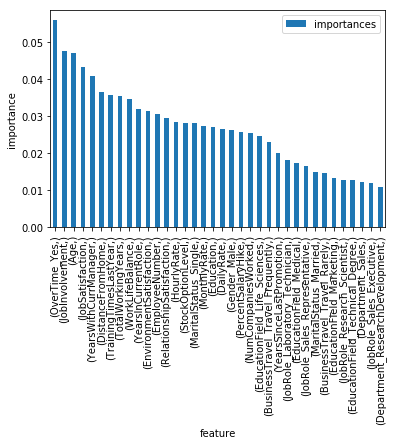

In [555]:
plt.figure(figsize=(7,14))
Logit_best.plot(kind="bar")
plt.xlabel("feature")
plt.ylabel("importance")
plt.show()

# Creating new logit woth important features


In [557]:
#deleting some variables
data_new=data[["Attrition","Age","DistanceFromHome","EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction","NumCompaniesWorked", 
"RelationshipSatisfaction", "TrainingTimesLastYear","WorkLifeBalance", "YearsInCurrentRole","YearsSinceLastPromotion", 
"BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely", "Gender_Male","JobRole_Laboratory_Technician", 
"MaritalStatus_Single", "OverTime_Yes"]]
X_new=X[["Age","DistanceFromHome","EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction","NumCompaniesWorked", 
"RelationshipSatisfaction", "TrainingTimesLastYear","WorkLifeBalance", "YearsInCurrentRole","YearsSinceLastPromotion", 
"BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely", "Gender_Male","JobRole_Laboratory_Technician", 
"MaritalStatus_Single", "OverTime_Yes"]]
X_train_new=X_train[["Age","DistanceFromHome","EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction","NumCompaniesWorked", 
"RelationshipSatisfaction", "TrainingTimesLastYear","WorkLifeBalance", "YearsInCurrentRole","YearsSinceLastPromotion", 
"BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely", "Gender_Male","JobRole_Laboratory_Technician", 
"MaritalStatus_Single", "OverTime_Yes"]]
X_test_new=X_test[["Age","DistanceFromHome","EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction","NumCompaniesWorked", 
"RelationshipSatisfaction", "TrainingTimesLastYear","WorkLifeBalance", "YearsInCurrentRole","YearsSinceLastPromotion", 
"BusinessTravel_Travel_Frequently","BusinessTravel_Travel_Rarely", "Gender_Male","JobRole_Laboratory_Technician", 
"MaritalStatus_Single", "OverTime_Yes"]]
formula_new="Attrition~"+"+".join(X_new.columns)
logit_new=Logit.from_formula(formula=formula_new,data=data_new).fit()
logit_new.summary()

Optimization terminated successfully.
         Current function value: 0.324057
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1395
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                           17
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:                  0.2780
Time:                        18:26:52   Log-Likelihood:                -452.06
converged:                       True   LL-Null:                       -626.11
                                        LLR p-value:                 1.221e-63
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            2.8672      0.794      3.610      0.000       1.310       4.424
Age                                 -0.0602      0.011     -5.385      0.000      -0.082      -0.038
DistanceFromHome                     0.0375      0.010      3.668      0.000       0.017       0.058
EnvironmentSatisfaction             -0.3940      0.078     -5.051      0.000      -0.547      -0.241
JobInvolvement                      -0.5960      0.117     -5.076      0.000      -0.826      -0.366
JobSatisfaction                     -0.3867      0.077     -5.008      0.000      -0.538      -0.235
NumCompaniesWorked                   0.1390      0.035      3.982      0.000       0.071       0.207
RelationshipSatisfaction            -0.2463      0.080     -3.094      0.002      -0.402      -0.090
TrainingTimesLastYear               -0.1484      0.070     -2.122      0.034      -0.285      -0.011
WorkLifeBalance                     -0.2641      0.118     -2.234      0.025      -0.496      -0.032
YearsInCurrentRole                  -0.1931      0.036     -5.404      0.000      -0.263      -0.123
YearsSinceLastPromotion              0.1525      0.040      3.823      0.000       0.074       0.231
BusinessTravel_Travel_Frequently     1.8555      0.397      4.671      0.000       1.077       2.634
BusinessTravel_Travel_Rarely         1.0002      0.369      2.711      0.007       0.277       1.723
Gender_Male                          0.4227      0.179      2.359      0.018       0.072       0.774
JobRole_Laboratory_Technician        0.5444      0.205      2.650      0.008       0.142       0.947
MaritalStatus_Single                 1.1246      0.179      6.294      0.000       0.774       1.475
OverTime_Yes                         1.8471      0.183     10.071      0.000       1.488       2.207
====================================================================================================
"""

all the variables here are significant

In [558]:
gridsearch_new=GridSearchCV(LogisticRegression(class_weight="balanced",random_state=42),
                         param_grid={"C":np.linspace(0.0001,30,10),"penalty":["l1","l2"]},
                         scoring="roc_auc",cv=5,n_jobs=-1)
gridsearch_new.fit(X_new,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 3.33342e+00, 6.66674e+00, 1.00001e+01, 1.33334e+01,
       1.66667e+01, 2.00000e+01, 2.33334e+01, 2.66667e+01, 3.00000e+01]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [559]:
best_new=list(gridsearch_new.best_params_.values())
print(best_new)

[23.333355555555556, 'l2']


In [560]:
logit_new=LogisticRegression(C=best_new[0],class_weight="balanced",penalty=best_new[1],random_state=42)
logit_new.fit(X_train_new,Y_train)

LogisticRegression(C=23.333355555555556, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [562]:
#we see that now we have even underfitting
for i in [logit_new]:
    print("Recall_train:",(recall_score(Y_train,i.predict(X_train_new))).round(4)*100)
    print("Recall_test:",(recall_score(Y_test,i.predict(X_test_new))).round(4)*100)
    print("roc_auc_train:",(roc_auc_score(Y_train,i.predict(X_train_new))).round(4)*100)
    print("roc_auc_test:",(roc_auc_score(Y_test,i.predict(X_test_new))).round(4)*100)
    print("Train scores:",(i.score(X_train_new,Y_train)).round(4)*100)
    print("Test scores:",(i.score(X_test_new,Y_test)).round(4)*100)

Recall_train: 76.84
Recall_test: 74.07000000000001
roc_auc_train: 76.8
roc_auc_test: 76.87
Train scores: 76.77000000000001
Test scores: 78.8


We should delete the variables step by step to have better results.